Shar Clark

In [54]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates


In [2]:
df = pd.read_csv('Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month (1).csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


# Part 1

In [10]:
#Filter the 4 largest cities into a new dataframe
df = df.loc[:3]

df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [12]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [14]:
#Melt the data to long-form and prepare it for time series analysis
melted = pd.melt(df, id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType',
                            'StateName', 'State', 'Metro', 'CountyName'], var_name = 'Date')
melted
                

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [17]:
#Convert the melted dates into datetime datatype.
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [18]:
#Make the datetime column the index. - rename df as ts
ts = melted.set_index('Date')
ts

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [22]:
#Resample the dataframe as monthly frequency, grouped by City.
#used mean aggregate
df_ts = ts.groupby('RegionName').resample('M').mean()
df_ts

/var/folders/xw/n3kj7zts4fjg477wm5hmpsyc0000gn/T/ipykernel_29202/3275598239.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = ts.groupby('RegionName').resample('M').mean()
/var/folders/xw/n3kj7zts4fjg477wm5hmpsyc0000gn/T/ipykernel_29202/3275598239.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = ts.groupby('RegionName').resample('M').mean()
/var/folders/xw/n3kj7zts4fjg477wm5hmpsyc0000gn/T/ipykernel_29202/3275598239.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric

RegionID  SizeRank     value
RegionName Date                                    
Chicago    2000-01-31   17426.0       3.0  166139.0
           2000-02-29   17426.0       3.0  166536.0
           2000-03-31   17426.0       3.0  167368.0
           2000-04-30   17426.0       3.0  168826.0
           2000-05-31   17426.0       3.0  170499.0
...                         ...       ...       ...
New York   2022-05-31    6181.0       0.0  768797.0
           2022-06-30    6181.0       0.0  773944.0
           2022-07-31    6181.0       0.0  777692.0
           2022-08-31    6181.0       0.0  779960.0
           2022-09-30    6181.0       0.0  781622.0

[1092 rows x 3 columns]

# Part 2


In [40]:
plot_df = df_ts.drop(columns = ['RegionID', 'SizeRank'])
plot_df

value
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

<AxesSubplot: xlabel='RegionName,Date'>

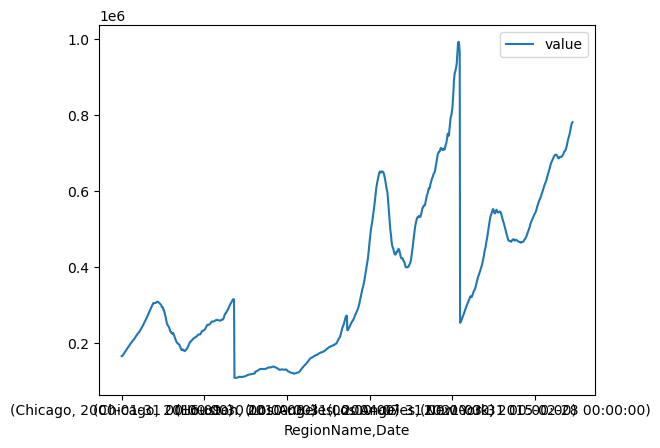

In [41]:
# Plot the home values for all 4 cities.
plot_df.plot()

In [42]:
plot_df.index.get_level_values(0)
# level 0 is Region Name

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [43]:
plot_df.index.get_level_values(1)
# date is 1

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [44]:
unstacked = plot_df.unstack(level = 0) 
unstacked

value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [68]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters

fmt_thous = mticks.FuncFormatter(thousands)

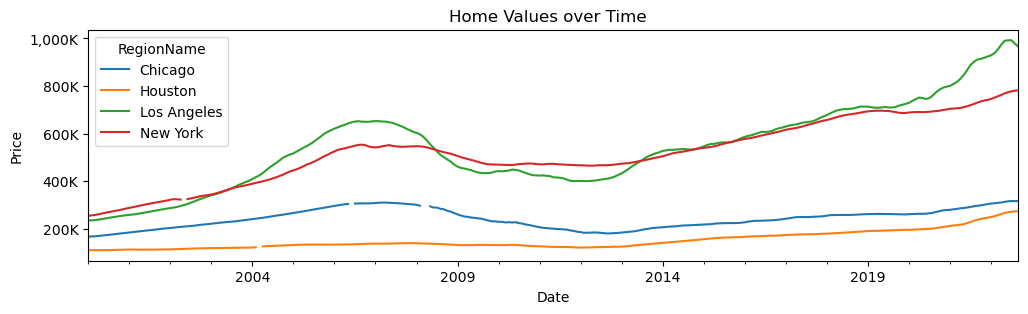

In [70]:
ax = unstacked['value'].plot(figsize=(12,3), title = 'Home Values over Time  ', ylabel = 'Price')
ax.yaxis.set_major_formatter(fmt_thous)

## 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [76]:
# You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
max_2008 = plot_df.loc[pd.IndexSlice[:, '2008'],:].idxmax()
max_2008

value    (Los Angeles, 2008-01-31 00:00:00)
dtype: object

In [78]:
min_2008 = plot_df.loc[pd.IndexSlice[:, '2008'],:].idxmin()
min_2008

value    (Houston, 2008-12-31 00:00:00)
dtype: object

Los Angeles had the highest home value in 2008. Houston had the lowest. 

## 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [92]:
# you can use .diff() to calculate the change in values
## first get a df with values of just nov -dec 2008

nv_2008= plot_df.loc[pd.IndexSlice[:, '11-2008':'12-2008'],:]
nv_2008

value
RegionName  Date                
Chicago     2008-11-30  271059.0
            2008-12-31  265306.0
Houston     2008-11-30  132247.0
            2008-12-31  131283.0
Los Angeles 2008-11-30  481905.0
            2008-12-31  469294.0
New York    2008-11-30  514767.0
            2008-12-31  510309.0

In [94]:
diff_2008 = nv_2008.diff()
diff_2008

value
RegionName  Date                
Chicago     2008-11-30       NaN
            2008-12-31   -5753.0
Houston     2008-11-30 -133059.0
            2008-12-31    -964.0
Los Angeles 2008-11-30  350622.0
            2008-12-31  -12611.0
New York    2008-11-30   45473.0
            2008-12-31   -4458.0